In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


In [60]:
# read CSV
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv')
df = df.drop('id', axis=1)
# encoding field 'sex' -> numbet
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# 피처링과 레이블 분리
X = df.drop('Rings', axis=1).values  
y = df['Rings'].values              

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 딥 러닝 회귀 모델 구축

In [64]:
model = Sequential()
model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # MSE vs MAE
model.summary()


D:\Tool File\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

## train model

In [67]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 71.7216 - mae: 7.3780 - val_loss: 11.0567 - val_mae: 2.4262
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.1056 - mae: 2.1051 - val_loss: 5.5793 - val_mae: 1.7369
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3683 - mae: 1.7628 - val_loss: 5.2095 - val_mae: 1.6737
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.0286 - mae: 1.6896 - val_loss: 4.6758 - val_mae: 1.5789
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0778 - mae: 1.6094 - val_loss: 4.3482 - val_mae: 1.5400
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6466 - mae: 1.5476 - val_loss: 4.2483 - val_mae: 1.4847
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8426 - mae: 1.5316 - val_loss: 4.0524 - val_mae: 1.4695
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9675 - mae: 1.5753 - val_loss: 4.3289 - val_mae: 1.5284
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.

In [69]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5874 - mae: 1.5023
Test Loss (MSE): 4.5293
Test MAE: 1.5032


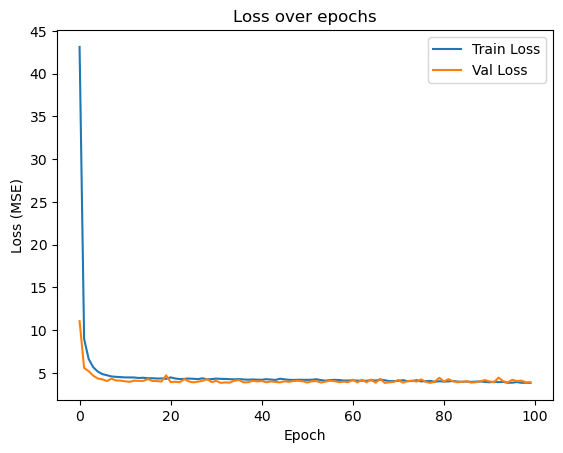

In [71]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


In [73]:
y_pred = model.predict(X_test).flatten()


df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred, 1)})
print(df_compare.head(10))


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
   Actual  Predicted
0       9       12.1
1       8        8.9
2      16       14.0
3       9       11.2
4      14       12.3
5      11       11.1
6       7        8.8
7       6        8.9
8       7        6.8
9      10       10.2


In [77]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5874 - mae: 1.5023


[4.529348373413086, 1.503218650817871]